In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import pandas as pd
import numpy as np


In [6]:
df_test = pd.read_csv('fraudTest.csv')

In [7]:
df_train = pd.read_csv('fraudTrain.csv')

In [8]:
df = pd.concat([df_test, df_train], ignore_index=True)

In [9]:
df.shape

(1852394, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [11]:
cols = list(df.columns)
cols

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

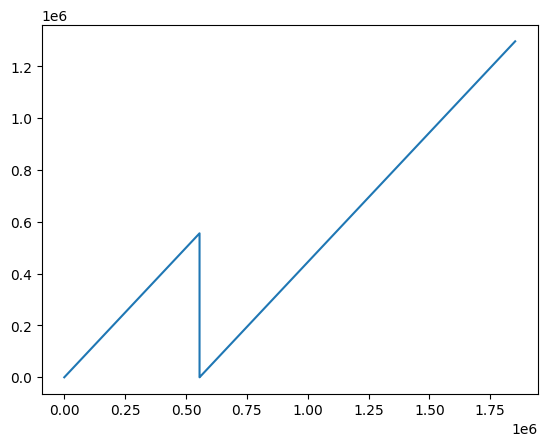

In [12]:
plt.plot(df['Unnamed: 0'])

In [13]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

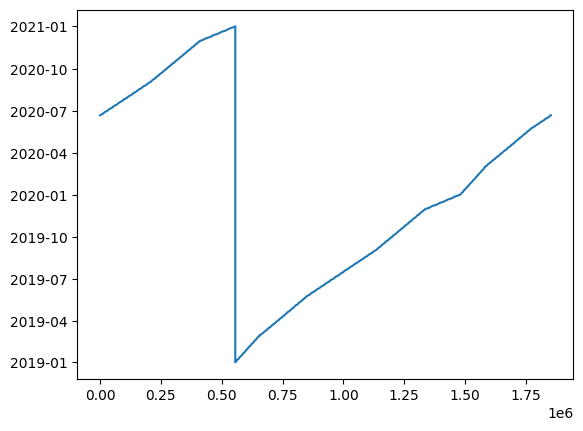

In [14]:
plt.plot(df['trans_date_trans_time'])

(array([1682623.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,   74717.,   95054.]),
 array([6.04162072e+10, 4.99234694e+17, 9.98469328e+17, 1.49770396e+18,
        1.99693860e+18, 2.49617323e+18, 2.99540786e+18, 3.49464250e+18,
        3.99387713e+18, 4.49311176e+18, 4.99234640e+18]),
 <BarContainer object of 10 artists>)

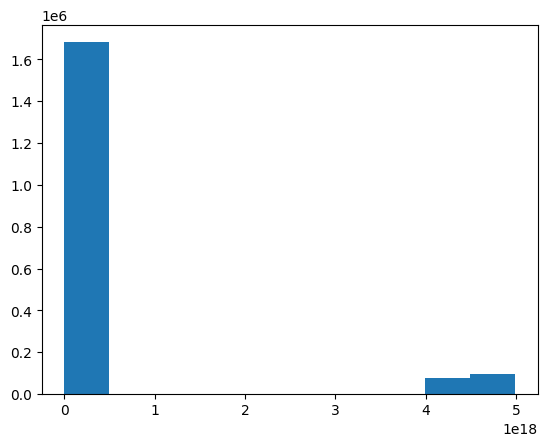

In [15]:
plt.hist(df['cc_num'])

In [16]:
df['merchant'].value_counts()

merchant
fraud_Kilback LLC                        6262
fraud_Cormier LLC                        5246
fraud_Schumm PLC                         5195
fraud_Kuhn LLC                           5031
fraud_Boyer PLC                          4999
                                         ... 
fraud_Douglas, DuBuque and McKenzie      1101
fraud_Treutel-King                       1098
fraud_Satterfield-Lowe                   1095
fraud_Hahn, Douglas and Schowalter       1091
fraud_Ritchie, Bradtke and Stiedemann    1090
Name: count, Length: 693, dtype: int64

In [17]:
model = LabelEncoder()
df['merchant'] = model.fit_transform(df['merchant'])
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,319,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,591,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,611,health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,222,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,292,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


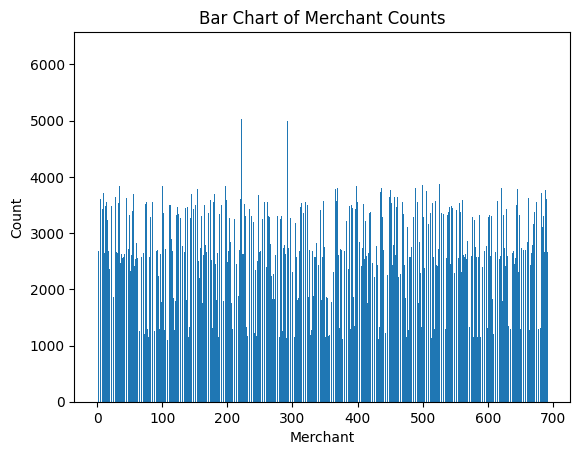

In [18]:
plt.bar(df['merchant'].unique(), df['merchant'].value_counts())
plt.xlabel('Merchant')
plt.ylabel('Count')
plt.title('Bar Chart of Merchant Counts')
plt.show()

In [19]:
df['category'].value_counts()

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

In [20]:
df['first']

0                 Jeff
1               Joanne
2               Ashley
3                Brian
4               Nathan
              ...     
1852389           Erik
1852390        Jeffrey
1852391    Christopher
1852392         Joseph
1852393        Jeffrey
Name: first, Length: 1852394, dtype: object

In [21]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,319,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,591,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,611,health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,222,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,292,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


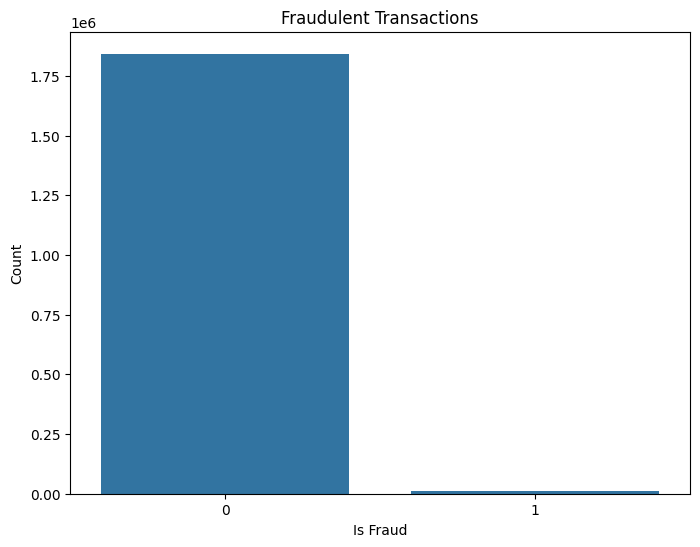

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df)
plt.title('Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()


In [23]:
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df['day_of_week']

0          Sunday
1          Sunday
2          Sunday
3          Sunday
4          Sunday
            ...  
1852389    Sunday
1852390    Sunday
1852391    Sunday
1852392    Sunday
1852393    Sunday
Name: day_of_week, Length: 1852394, dtype: object

In [24]:
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_hour']

0          12
1          12
2          12
3          12
4          12
           ..
1852389    12
1852390    12
1852391    12
1852392    12
1852393    12
Name: trans_hour, Length: 1852394, dtype: int32

In [25]:
df['year_month'] = df['trans_date_trans_time'].dt.to_period('M')
df['year_month']

0          2020-06
1          2020-06
2          2020-06
3          2020-06
4          2020-06
            ...   
1852389    2020-06
1852390    2020-06
1852391    2020-06
1852392    2020-06
1852393    2020-06
Name: year_month, Length: 1852394, dtype: period[M]

In [26]:
df['category']

0           personal_care
1           personal_care
2          health_fitness
3                misc_pos
4                  travel
                ...      
1852389     entertainment
1852390       food_dining
1852391       food_dining
1852392       food_dining
1852393       food_dining
Name: category, Length: 1852394, dtype: object

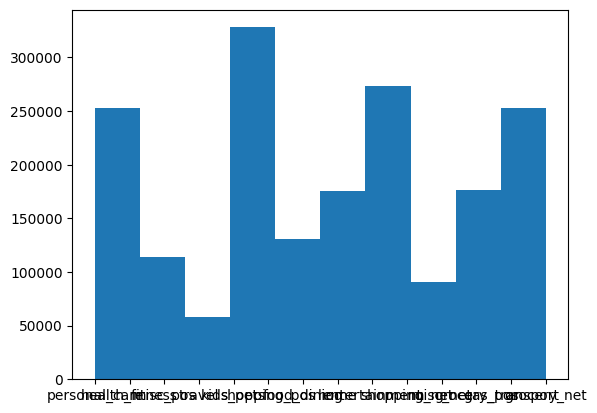

In [27]:
plt.hist(df['category'])
plt.show()

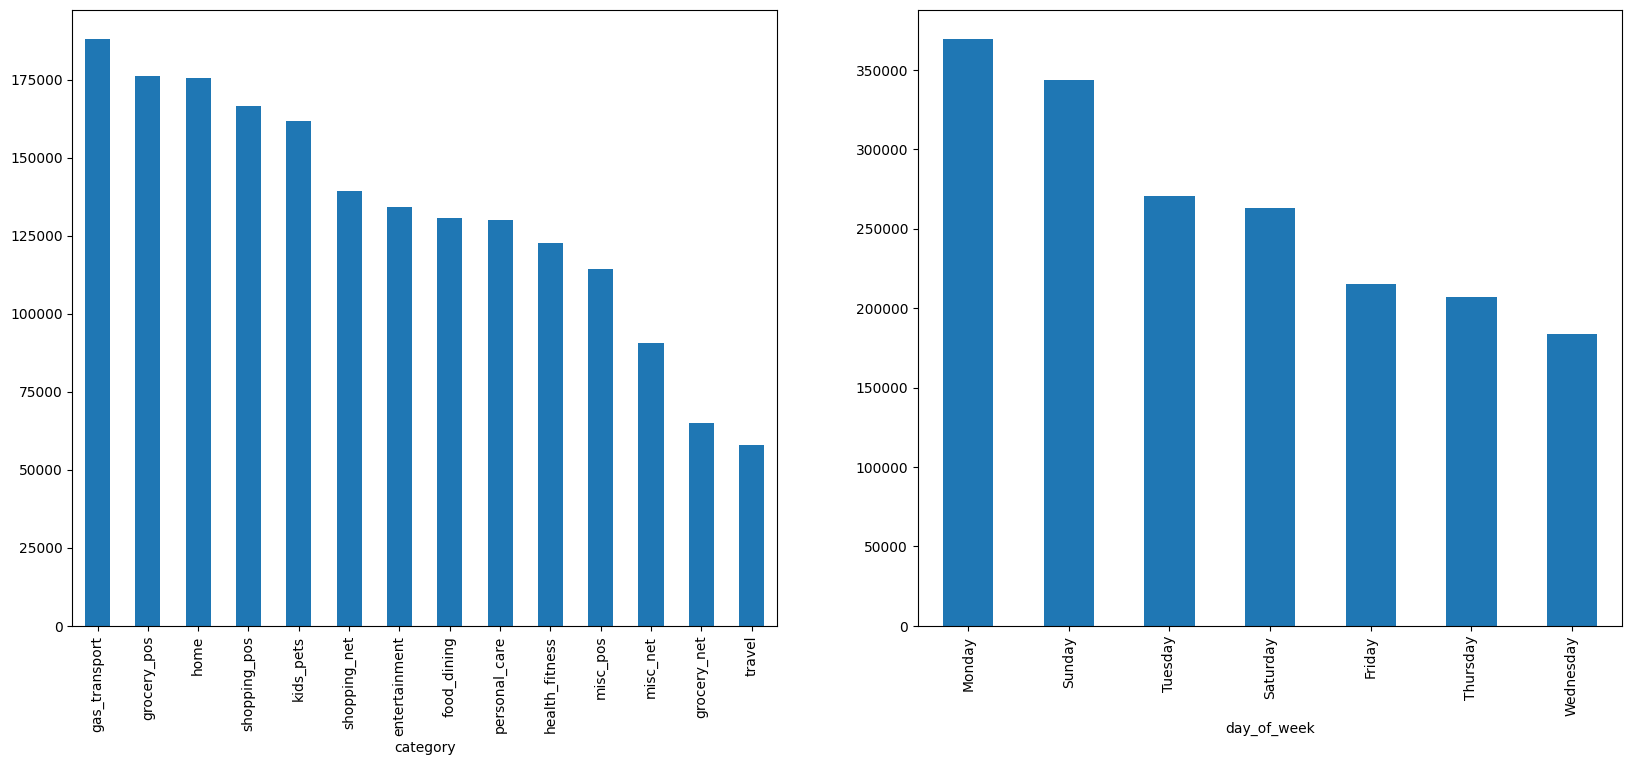

In [28]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
df['category'].value_counts().plot.bar()
plt.subplot(1,2,2)
df['day_of_week'].value_counts().plot.bar()
plt.show()

In [29]:
def calculate_age(row):
    return np.round((row['trans_date_trans_time'] - row['dob']).days / 365.25)
df['dob'] = pd.to_datetime(df['dob'])
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['age'] = df.apply(calculate_age, axis=1)


In [30]:
df[['age']]

,age
0,52.0
1,30.0
2,50.0
3,33.0
4,65.0
...,...
1852389,59.0
1852390,41.0
1852391,53.0
1852392,40.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 27 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   trans_date_trans_time  datetime64[ns]
 2   cc_num                 int64         
 3   merchant               int32         
 4   category               object        
 5   amt                    float64       
 6   first                  object        
 7   last                   object        
 8   gender                 object        
 9   street                 object        
 10  city                   object        
 11  state                  object        
 12  zip                    int64         
 13  lat                    float64       
 14  long                   float64       
 15  city_pop               int64         
 16  job                    object        
 17  dob                    datetime64[ns]
 18  trans_num             

In [32]:
df.drop(columns=['lat','long','merch_lat','merch_long'],axis=1,inplace=True)

In [33]:
df.drop(columns=['trans_num', 'merchant','first', 'last', 'street','unix_time'],axis=1,inplace=True)

In [34]:
df.drop(columns=['dob'],axis=1,inplace=True)

In [35]:
df.shape

(1852394, 16)

In [36]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,city_pop,job,is_fraud,day_of_week,trans_hour,year_month,age
0,0,2020-06-21 12:14:25,2291163933867244,personal_care,2.86,M,Columbia,SC,29209,333497,Mechanical engineer,0,Sunday,12,2020-06,52.0
1,1,2020-06-21 12:14:33,3573030041201292,personal_care,29.84,F,Altonah,UT,84002,302,"Sales professional, IT",0,Sunday,12,2020-06,30.0
2,2,2020-06-21 12:14:53,3598215285024754,health_fitness,41.28,F,Bellmore,NY,11710,34496,"Librarian, public",0,Sunday,12,2020-06,50.0
3,3,2020-06-21 12:15:15,3591919803438423,misc_pos,60.05,M,Titusville,FL,32780,54767,Set designer,0,Sunday,12,2020-06,33.0
4,4,2020-06-21 12:15:17,3526826139003047,travel,3.19,M,Falmouth,MI,49632,1126,Furniture designer,0,Sunday,12,2020-06,65.0


In [37]:
model = LabelEncoder()
df['trans_date_trans_time'] = model.fit_transform(df['trans_date_trans_time'])
df['category'] = model.fit_transform(df['category'])
df['gender'] = model.fit_transform(df['gender'])
df['cc_num'] = model.fit_transform(df['cc_num'])
df['job'] = model.fit_transform(df['job'])
df['city'] = model.fit_transform(df['city'])
df['state'] = model.fit_transform(df['state'])

In [38]:
model = LabelEncoder()
df['year_month'] = model.fit_transform(df['year_month'])

In [39]:
df['day_of_week'] = model.fit_transform(df['day_of_week'])
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,category,amt,gender,city,state,zip,city_pop,job,is_fraud,day_of_week,trans_hour,year_month,age
0,0,1274791,437,10,2.86,1,168,40,29209,333497,288,0,3,12,17,52.0
1,1,1274792,596,10,29.84,0,16,44,84002,302,406,0,3,12,17,30.0
2,2,1274793,642,5,41.28,0,64,34,11710,34496,272,0,3,12,17,50.0
3,3,1274794,629,9,60.05,1,814,9,32780,54767,422,0,3,12,17,33.0
4,4,1274795,503,13,3.19,1,262,22,49632,1126,205,0,3,12,17,65.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  int64  
 2   cc_num                 int64  
 3   category               int32  
 4   amt                    float64
 5   gender                 int32  
 6   city                   int32  
 7   state                  int32  
 8   zip                    int64  
 9   city_pop               int64  
 10  job                    int32  
 11  is_fraud               int64  
 12  day_of_week            int32  
 13  trans_hour             int32  
 14  year_month             int32  
 15  age                    float64
dtypes: float64(2), int32(8), int64(6)
memory usage: 169.6 MB


In [41]:
X = df.drop('is_fraud', axis = 1)
y = df[['is_fraud']]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\praga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [44]:
model.score(X_train,y_train)

0.9943252091083495

In [45]:
model.score(X_test,y_test)

0.9943889244238833

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.9980156750222071


In [48]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

C:\Users\praga\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9999991942651013
0.9985391572916991
